In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [83]:
torch.random.manual_seed(12)
X = torch.arange(0, 10, .5)
y = 3 * X + 4 + torch.randn(20) * 2

In [84]:
y

tensor([ 3.7360,  5.2491,  7.6886,  7.5962,  7.4110, 10.9754, 11.9295, 17.1932,
        14.6085, 17.3956, 18.9297, 21.5548, 20.6111, 23.0751, 25.4724, 24.0123,
        30.8800, 31.0893, 32.6887, 35.0336])

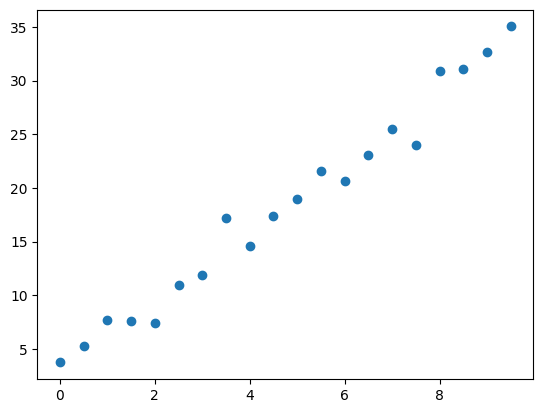

In [85]:
plt.scatter(X, y)

In [121]:
def get_model():
    # lin_model = nn.Linear(1, 1)
    model = nn.Sequential(
        nn.Linear(1, 12),
        nn.ReLU(),
        nn.Linear(12, 1)
    )
    return model

def get_loss_fn():
    return nn.MSELoss()

def get_optimizer(model:nn.Module):
    return torch.optim.SGD(model.parameters(), lr=0.01)

In [113]:
get_model()

Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)

In [87]:
X = X.view(-1, 1)
y = y.view(-1, 1)

In [88]:
X = (X - X.mean())/X.std()

In [89]:
X_train, y_train = X[:15], y[:15]

In [90]:
X_val, y_val= X[15:], y[15:]

In [91]:
p=torch.randperm(len(X_train))
X_train[p], p

(tensor([[-1.0987],
         [-0.4226],
         [ 0.0845],
         [ 0.2535],
         [-0.5916],
         [-0.0845],
         [-1.6058],
         [ 0.4226],
         [-1.4368],
         [-0.2535],
         [-1.2677],
         [-0.9297],
         [-0.7606],
         [ 0.5916],
         [ 0.7606]]),
 tensor([ 3,  7, 10, 11,  6,  9,  0, 12,  1,  8,  2,  4,  5, 13, 14]))

In [122]:
def training_loop(n_epochs:int, bs:int, X_train, y_train, X_val, y_val):
    model = get_model()
    optimizer:torch.optim.Optimizer = get_optimizer(model)
    loss_fn = get_loss_fn()
    train_loss =[]
    val_loss = []
    for epoch in range(1, n_epochs+1):
        perm_train = torch.randperm(len(X_train))
        perm_val = torch.randperm(len(X_val))
        X_train_epoch = X_train[perm_train]
        y_train_epoch = y_train[perm_train]
        X_val_epoch = X_val[perm_val]
        y_val_epoch = y_val[perm_val]
        for i in range(0, len(X_train), bs):
            X_train_bs = X_train[i:i+bs]
            y_train_bs = y_train[i:i+bs]
            # X_val_bs = X_val[i:i+bs]
            # y_val_bs = y_val[i:i+bs]
            
            y_pred_bs = model(X_train_bs)
            loss = loss_fn(y_pred_bs, y_train_bs)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print per batch train loss
            print(f"Epoch: {epoch}, Batch: {i//bs+1}, Train Loss: {loss.item()}")

        # Calculate validation loss
        with torch.no_grad():
            y_pred_val = model(X_val_epoch)
            val_loss = loss_fn(y_pred_val, y_val_epoch)
            # Print per epoch validation loss
            print(f"Epoch: {epoch}, Validation Loss: {val_loss.item()}")

        # Print model parameters
        for name, param in model.named_parameters():
            print(f"Epoch: {epoch}, Model Parameter - {name}: {param.data}")

        print()  # Add an empty line between epochs
        
    return model
            
            

In [ ]:

m = training_loop(1010, 2, X_train, y_train, X_val, y_val)

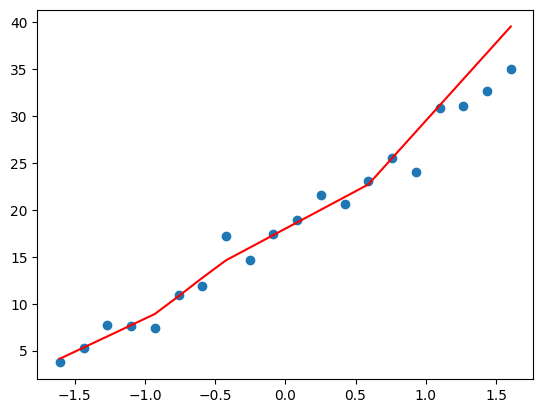

In [124]:
plt.scatter(X, y)
plt.plot(X, m(X).detach(), color='red')